In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import geeksw.hgcal.testbeam as hgc
import math

In [3]:
electron_runlist = hgc.runlist.query('Particle == "electron"')
electron_runlist = electron_runlist.query('Configuration == "22b"') 
electron_runlist = hgc.runlist.query("Particle == 'electron'").groupby("Energy").apply(lambda x : x.iloc[1])
#electron_runlist = electron_runlist.reset_index()
energy = electron_runlist.Energy.values

In [4]:
#hdf = hgc.load_run(384, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0"])
#print (hdf)
#rechitX0 = hdf.groupby("event").rechit_X0.mean()
#rechitX0 = rechitX0.reset_index()
#rechitX0_mean = rechitX0.rechit_X0.mean()
#rechitX0_mean

In [5]:
run_numbers = electron_runlist.Run.values
X0_meanvalue = []
X0_variance = []
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0"])
    rechitX0 = hdf.groupby("event").rechit_X0.mean()
    rechitX0 = rechitX0.reset_index()
    rechitX0_mean = rechitX0.rechit_X0.mean()
    rechitX0_variance = rechitX0.rechit_X0.std()
    X0_meanvalue.append(rechitX0_mean)
    X0_variance.append(rechitX0_variance)
X0_meanvalue

[19.155694555805052,
 18.000370024620747,
 17.073346770977675,
 16.479892835554498,
 16.356339412732446,
 16.443592283688037,
 16.451421010755894,
 16.218006564626624,
 16.840732551419183,
 16.817238491835695]

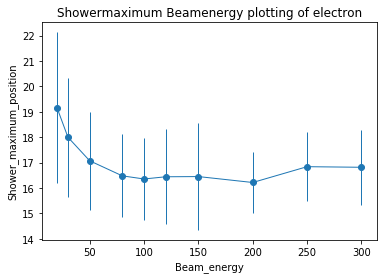

In [6]:
plt.errorbar(energy, X0_meanvalue, yerr=X0_variance, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()

In [7]:
beamenergy = []
for energies in energy:
    energies = math.log(energies,10)
    beamenergy.append(energies)
beamenergy

[1.301029995663981,
 1.4771212547196624,
 1.6989700043360185,
 1.9030899869919433,
 2.0,
 2.0791812460476247,
 2.176091259055681,
 2.301029995663981,
 2.397940008672037,
 2.477121254719662]

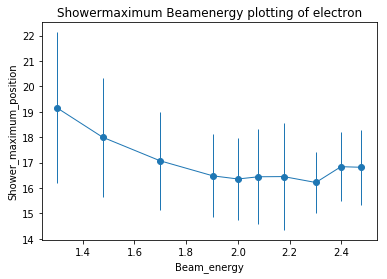

In [8]:
plt.errorbar(beamenergy, X0_meanvalue, yerr=X0_variance, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()

In [30]:
#hdf = hgc.load_run(384, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
#total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
#total_sum = total_sum.reset_index()
#total_sum
#rechitX0_sum = total_sum.rechit_X0
#rechit_energy_sum = total_sum.rechit_energy
#rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()/(rechit_energy_sum.sum())
#rechitX0_mean

11.265253704381955

In [51]:
hdf = hgc.load_run(384, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
total_sum = total_sum.reset_index()
total_sum = total_sum.groupby("rechit_X0").median()
total_sum = total_sum.reset_index()
total_sum["rechit_energy"] = total_sum["rechit_energy"]/total_sum["rechit_energy"].sum()
total_sum
rechitX0_sum = total_sum.rechit_X0
rechit_energy_sum = total_sum.rechit_energy
rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()
rechitX0_mean

11.057355402741674

In [31]:
run_numbers = electron_runlist.Run.values
X0_meanvalue = []
X0_variance = []
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
    total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
    total_sum = total_sum.reset_index()
    total_sum
    rechitX0_sum = total_sum.rechit_X0
    rechit_energy_sum = total_sum.rechit_energy
    rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()/(rechit_energy_sum.sum())
    #rechitX0_variance = rechitX0.rechit_X0.std()
    X0_meanvalue.append(rechitX0_mean)
    #X0_variance.append(rechitX0_variance)
X0_meanvalue

[9.2979519692005255,
 9.34975544743555,
 9.5374269148919915,
 9.8886668667974575,
 10.129801611618946,
 10.338353281920048,
 10.615272829990282,
 10.772416829937219,
 11.281129765218013,
 11.346635905066885]

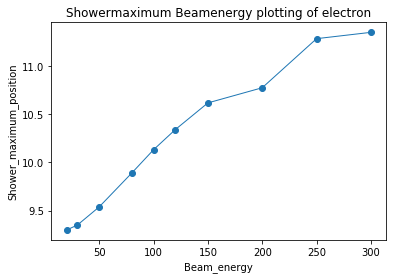

In [38]:
i = [0,0,0,0,0,0,0,0,0,0]
plt.errorbar(energy, X0_meanvalue, yerr=i, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()

In [45]:
beamenergy = []
for energies in energy:
    energies = math.log(energies,10)
    beamenergy.append(energies)
beamenergy

[1.301029995663981,
 1.4771212547196624,
 1.6989700043360185,
 1.9030899869919433,
 2.0,
 2.0791812460476247,
 2.176091259055681,
 2.301029995663981,
 2.397940008672037,
 2.477121254719662]

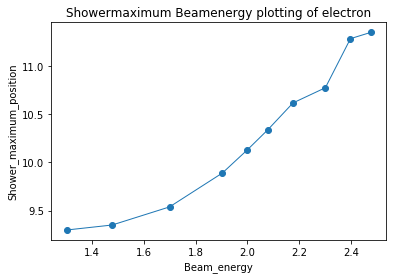

In [46]:
i = [0,0,0,0,0,0,0,0,0,0]
plt.errorbar(beamenergy, X0_meanvalue, yerr=i, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()

In [52]:
run_numbers = electron_runlist.Run.values
X0_meanvalue = []
X0_variance = []
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
    total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
    total_sum = total_sum.reset_index()
    total_sum = total_sum.groupby("rechit_X0").median()
    total_sum = total_sum.reset_index()
    total_sum["rechit_energy"] = total_sum["rechit_energy"]/total_sum["rechit_energy"].sum()
    rechitX0_sum = total_sum.rechit_X0
    rechit_energy_sum = total_sum.rechit_energy
    rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()
    #rechitX0_variance = rechitX0.rechit_X0.std()
    X0_meanvalue.append(rechitX0_mean)
    #X0_variance.append(rechitX0_variance)
X0_meanvalue

[9.0908222545822195,
 9.104581041180122,
 9.3982366268956383,
 9.7401971077428247,
 9.9731704378217039,
 10.138682157188933,
 10.379362098170571,
 10.644386481883759,
 11.052819223059981,
 11.140902345596832]

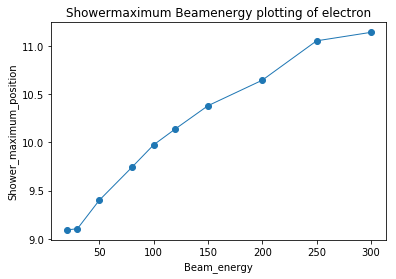

In [53]:
i = [0,0,0,0,0,0,0,0,0,0]
plt.errorbar(energy, X0_meanvalue, yerr=i, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()

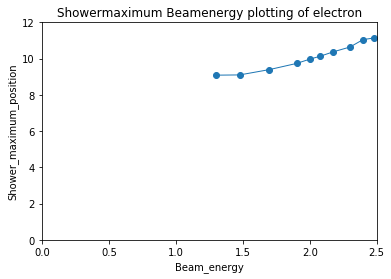

In [56]:
beamenergy = []
for energies in energy:
    energies = math.log(energies,10)
    beamenergy.append(energies)
beamenergy
i = [0,0,0,0,0,0,0,0,0,0]
plt.errorbar(beamenergy, X0_meanvalue, yerr=i, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.xlim(0,2.5)
plt.ylim(0,12)
plt.show()

In [4]:
electron_runlist = hgc.runlist.query('Particle == "electron"')
electron_runlist = electron_runlist.query('Configuration == "23c"') 
electron_runlist = hgc.runlist.query("Particle == 'electron'").groupby("Energy").apply(lambda x : x.iloc[1])
#electron_runlist = electron_runlist.reset_index()
energy = electron_runlist.Energy.values

In [5]:
run_numbers = electron_runlist.Run.values
X0_meanvalue = []
X0_variance = []
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
    total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
    total_sum = total_sum.reset_index()
    total_sum
    rechitX0_sum = total_sum.rechit_X0
    rechit_energy_sum = total_sum.rechit_energy
    rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()/(rechit_energy_sum.sum())
    #rechitX0_variance = rechitX0.rechit_X0.std()
    X0_meanvalue.append(rechitX0_mean)
    #X0_variance.append(rechitX0_variance)
X0_meanvalue

[9.2979519692005255,
 9.34975544743555,
 9.5374269148919915,
 9.8886668667974575,
 10.129801611618946,
 10.338353281920048,
 10.615272829990282,
 10.772416829937219,
 11.281129765218013,
 11.346635905066885]

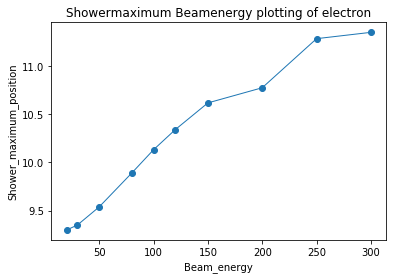

In [6]:
i = [0,0,0,0,0,0,0,0,0,0]
plt.errorbar(energy, X0_meanvalue, yerr=i, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()

In [7]:
beamenergy = []
for energies in energy:
    energies = math.log(energies,10)
    beamenergy.append(energies)
beamenergy

[1.301029995663981,
 1.4771212547196624,
 1.6989700043360185,
 1.9030899869919433,
 2.0,
 2.0791812460476247,
 2.176091259055681,
 2.301029995663981,
 2.397940008672037,
 2.477121254719662]

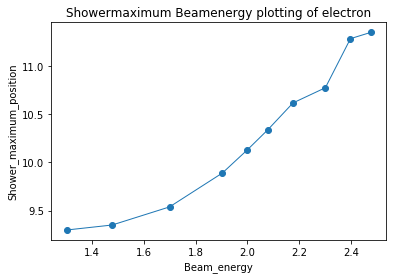

In [8]:
i = [0,0,0,0,0,0,0,0,0,0]
plt.errorbar(beamenergy, X0_meanvalue, yerr=i, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of electron")
plt.show()